In [1]:
from array import array
import math

In [2]:
ichoice = 2

n = 8000
pi = math.pi
lmbda = 1.0
xlow = -24.0*lmbda
dx = 48.0*lmbda/n
k=2.0*pi/lmbda
delta_k = 0.05*k

x = array('d')
y = array('d')
yf = array('d')

sim_integral = 0.0
theory_integral = 0.0
for i in range(0,n):
    x.append(xlow+i*dx+.0000001)
    y1 = math.sin(k*x[i])
    y2 = math.sin((k-0.125*delta_k)*x[i])
    y3 = math.sin((k+0.125*delta_k)*x[i])
    y4 = math.sin((k-0.25*delta_k)*x[i])
    y5 = math.sin((k+0.25*delta_k)*x[i])  
    y6 = math.sin((k-0.375*delta_k)*x[i])
    y7 = math.sin((k+0.375*delta_k)*x[i])
    y8 = math.sin((k-0.5*delta_k)*x[i])
    y9 = math.sin((k+0.5*delta_k)*x[i])   
    y10 = math.sin((k-0.625*delta_k)*x[i])
    y11 = math.sin((k+0.625*delta_k)*x[i])
    y12 = math.sin((k-0.75*delta_k)*x[i])
    y13 = math.sin((k+0.75*delta_k)*x[i])  
    y14 = math.sin((k-0.875*delta_k)*x[i])
    y15 = math.sin((k+0.875*delta_k)*x[i])
    y16 = math.sin((k-delta_k)*x[i])
    y17 = math.sin((k+delta_k)*x[i])
    ytemp = 1.0/17.0*(y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17)
    y.append(ytemp*ytemp)
    yf.append(math.sqrt(1.0/delta_k)*math.sin(k*x[i])*math.sin(delta_k*x[i])/x[i])
    yf[i]=yf[i]*yf[i]
    sim_integral += y[i]*dx
    theory_integral += yf[i]*dx
    
ymax = max(y)
ycrit = ymax/2.0

delta_x_theory = 2.0/delta_k

for i in range(n):
    if (y[i] > ycrit):
        xstart = x[i]
        break
for i in range(n-1,0,-1):
    if (y[i] > ycrit):
        xend = x[i]
        break

print(delta_x_theory,xend-xstart)
    
    
print ("Sim integral = %f" % sim_integral)
print ("Theory integral = %f" % theory_integral)


6.366197723675814 7.6080000000000005
Sim integral = 4.535454
Theory integral = 1.501506


Welcome to JupyROOT 6.18/02


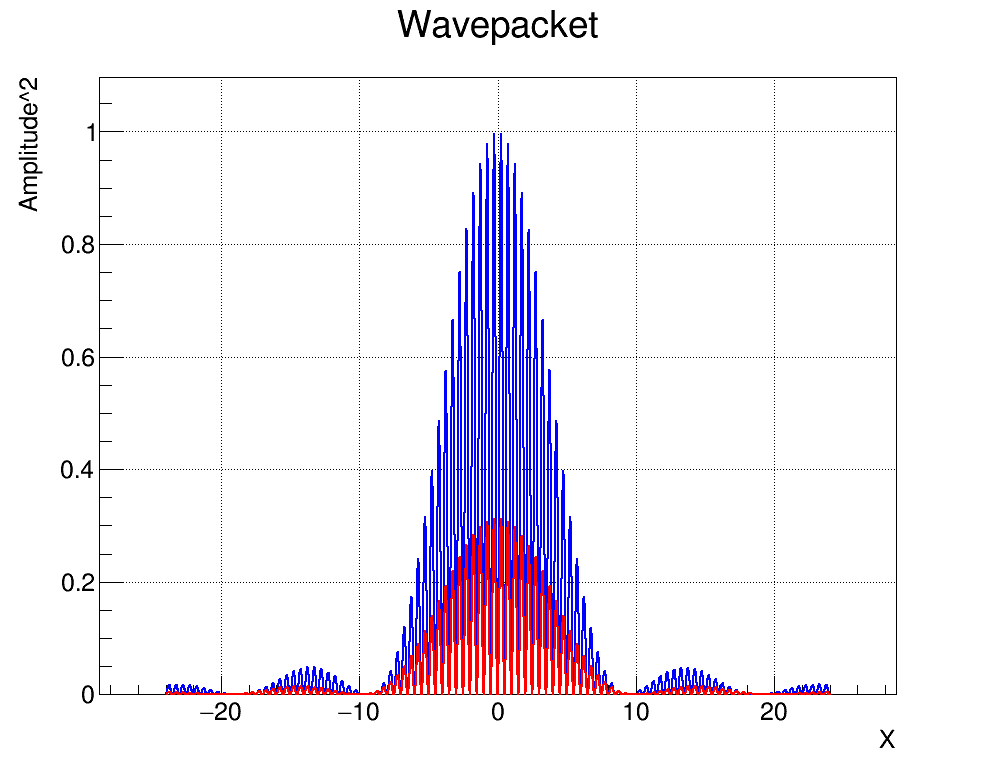

In [3]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle
c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(3,1)

gStyle.SetOptFit(1)
c1.cd()

gr = TGraph(n,x,y)
grf = TGraph(n,x,yf)

gr.SetLineColor(4)
gr.SetLineWidth(2)
grf.SetLineColor(2)
grf.SetLineWidth(2)

gr.SetTitle("Wavepacket")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Amplitude^2")

gr.Draw("AL")
if (ichoice>1):
    grf.Draw("L")
    
c1.Draw()